# Final Project
## Nabeel Emran
### 12/7/2023

***

#### Importing Relevant Packages

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#### Q1: Read in the data, call the dataframe "s"  and check the dimensions of the dataframe

In [2]:
s = pd.read_csv("social_media_usage.csv")
s.shape #There are 1,502 rows and 89 collumns 

(1502, 89)

***

#### Q2: Define a function called clean_sm that takes one input, x, and uses `np.where` to check whether x is equal to 1. If it is, make the value of x = 1, otherwise make it 0. Return x. Create a toy dataframe with three rows and two columns and test your function to make sure it works as expected.

In [3]:
#Creating Function: 
def clean_sm(x): 
    x = np.where(x == 1,1,0)
    return x 

#Creating toy dataframe: 
toy_data = {"Collumn 1": [1,2,3],
           "Collumn 2": [5,1,1]}

toy_dataframe = pd.DataFrame(toy_data)

#Testing the function: 
clean_sm(toy_dataframe)

#It appears to work. 

array([[1, 0],
       [0, 1],
       [0, 1]])

***

#### Q3: Create a new dataframe called "ss". The new dataframe should contain a target column called sm_li which should be a binary variable ( that takes the value of 1 if it is 1 and 0 otherwise (use clean_sm to create this) which indicates whether or not the individual uses LinkedIn, and the following features: income (ordered numeric from 1 to 9, above 9 considered missing), education (ordered numeric from 1 to 8, above 8 considered missing), parent (binary), married (binary), female (binary), and age (numeric, above 98 considered missing). Drop any missing values. Perform exploratory analysis to examine how the features are related to the target.

Written Answer: 

With resepct to the exploratory analysis, the staff created a corrleation heatmap to determine which depedent variables were highly correlated to one another. The staff found few depedent variables were highly correlated to one another. The staff also created multiple scatterplots to identify any potential relationships between the depedent variables and the target variable (smi_li). The staff identified that income appeared to be positively correlated to the target variable. 

In [4]:
#Initial Creation of Blank Dataframe 
ss = pd.DataFrame({
    "smi_li": clean_sm(s["web1h"]),
    "income": np.where(s["income"] > 9, np.nan, s["income"]),
    "education": np.where(s["educ2"] > 8, np.nan, s["educ2"]),
    "parent": np.where(s["par"]==1, 1, np.where(s["par"] == 2, 0, np.nan)),
    "married": np.where(s["marital"]==1, 1, np.where(s["marital"]>= 8, np.nan, 0)), 
    "female": np.where(s["gender"]==2, 1, np.where(s["gender"]>=98, np.nan, 0)), 
    "age": np.where(s["age"]>=98, np.nan, s["age"])
})

#Dropping Missing Values
ss = ss.dropna()

#Checking Rows and Collumns
ss.shape # 1,253 rows and 7 collumns. 


(1253, 7)

In [5]:
#Exploratory Analysis: 

#High Level Review of SS Dataframe:
ss.head()

,smi_li,income,education,parent,married,female,age
0,0,6.0,4.0,0.0,0.0,1.0,77.0
1,0,5.0,3.0,0.0,0.0,0.0,59.0
2,0,8.0,4.0,0.0,1.0,1.0,60.0
3,0,8.0,8.0,0.0,0.0,0.0,73.0
4,1,7.0,8.0,0.0,1.0,1.0,65.0


<Axes: >

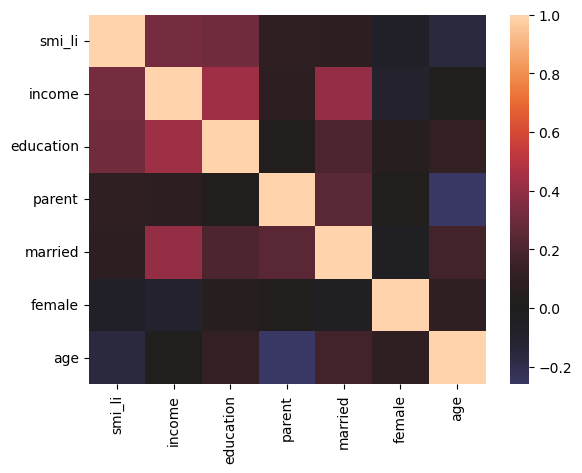

In [6]:
#Exploratory Analysis

#Collinearity Heatmap: 
sns.heatmap(ss.corr(), center=0)


In [7]:
#Exploratory Analysis: 

#Predictor Variables (Income & Gender) Analysis to Target Variable 
alt.Chart(ss.groupby(["income", "female"], as_index=False)["smi_li"].mean()).\
mark_circle().\
encode(x="income",
      y="smi_li",
      color="female:N")


alt.Chart(...)

In [8]:
#Exploratory Analysis: 

#Predictor Variables (Age & Married) Analysis to Target Variable 

alt.Chart(ss.groupby(["age", "married"], as_index=False)["smi_li"].mean()).\
mark_circle().\
encode(x="age",
      y="smi_li",
      color="married:N")

alt.Chart(...)

#### Q4: Create a target vector (y) and feature set (X)

In [9]:
y = ss["smi_li"]
X = ss[["income", "education", "parent", "married", "female", "age"]]

#### Q5: Split the data into training and test sets. Hold out 20% of the data for testing. Explain what each new object contains and how it is used in machine learning

Written Answer: 

The X_train variable are the dependent variables of our training set, while y_train is its target variable output. The X_train and y_train variables are part of the same row and are a subset (80% of our full data). The X_train and y_train variables are what we will build our logistical regression model off of. 

Meanwhile 20% of our full data is in the "test" set, this include the X_test and y_test. Once our model is built from the training data we will use the X_test variables to generate predictions, we will then compare these predictions to the actual target output (i.e., the y_test). 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,       
                                                    test_size=0.2,   
                                                    random_state=987)

#### Q6: Instantiate a logistic regression model and set class_weight to balanced. Fit the model with the training data.

In [11]:
#Instantiating the logistical regression model and setting class_weight to balanced: 
lr = LogisticRegression(class_weight = "balanced")

#Fitting the model with the training data:
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

#### Q7: Evaluate the model using the testing data. What is the model accuracy for the model? Use the model to make predictions and then generate a confusion matrix from the model. Interpret the confusion matrix and explain what each number means.

Written Answer: 

Our model accuracy is 71% (calculated via classification_report() function). This indiciates that the (correct predictions/total predictions) comes out to approximately 71%. 


Our confusion matrix indicates that the number of true positives (i.e., actual is value positive and model predicted positive) are 62, the number of true negatives are 116 (i.e., actual value is negative and model predicted negative), the number of false positives are 51 (i.e., actual value is negative and model predicted positive), the number of false negatives are 22 (actual value is positive and model predicted negative). 

In [12]:
#Creating Predictions from testing data: 
y_pred = lr.predict(X_test)

#Model Accuracy: 
print(classification_report(y_test, y_pred))

print(f"Based on the above classification_report, above, our model accuracy is 71%")

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       167
           1       0.55      0.74      0.63        84

    accuracy                           0.71       251
   macro avg       0.69      0.72      0.70       251
weighted avg       0.74      0.71      0.72       251

Based on the above classification_report, above, our model accuracy is 71%


In [13]:
#Confusion Matrix: 
confusion_matrix(y_test, y_pred)

array([[116,  51],
       [ 22,  62]], dtype=int64)

#### Q8: Create the confusion matrix as a dataframe and add informative column names and index names that indicate what each quadrant represents

In [14]:
#Confusion Matrix with Informative column names: 
pd.DataFrame(confusion_matrix(y_test, y_pred),
            columns=["Predicted negative", "Predicted positive"],
            index=["Actual negative","Actual positive"]).style.background_gradient(cmap="PiYG")

,Predicted negative,Predicted positive
Actual negative,116,51
Actual positive,22,62


#### Q9: Aside from accuracy, there are three other metrics used to evaluate model performance: precision, recall, and F1 score. Use the results in the confusion matrix to calculate each of these metrics by hand. Discuss each metric and give an actual example of when it might be the preferred metric of evaluation. After calculating the metrics by hand, create a classification_report using sklearn and check to ensure your metrics match those of the classification_report.

Written Answer: 

Precision is more useful when the goal of the model is to minimizes the number of false positives, in medicine like cancer screening the goal is to avoid falsely indicating a patient has cancer as the treatment may come at a high cost to the patient. 

Recall is more useful when the goal of the model is to minimize the number of false negatives, in certain instances like that of fraud it is more important to catch the positives, in this instance a false positive can quickly be resolved, but a false negative can have higher consequences.  

F1 Score is more useful when both false positives and false negatives are just as important, it provides a middle ground between precision and recall. 

In [15]:
#Calculating Metrics by Hand: 
precision = 62/(62+51) #Calculated via TP/(TP+FP)
recall = 62/(62+22)    #Calculated via TP/(TP+FN)

F1_numerator = precision*recall 
F1_demnominator = precision+recall 
F1_score = 2*(F1_numerator/F1_demnominator) #Calculated via 2((precision/recall)/(precision+recall))

print(f"The hand calculated precision score is {precision}")
print(f"The hand calculated recall score is {recall}")
print(f"The hand calculated F1 Score is {F1_score}\n")

#Clasification Report to ensure metrics match: 
print(f"Below is the classification report which corrborates the handcalculations: \n {classification_report(y_test, y_pred)}")

The hand calculated precision score is 0.5486725663716814
The hand calculated recall score is 0.7380952380952381
The hand calculated F1 Score is 0.6294416243654822

Below is the classification report which corrborates the handcalculations: 
               precision    recall  f1-score   support

           0       0.84      0.69      0.76       167
           1       0.55      0.74      0.63        84

    accuracy                           0.71       251
   macro avg       0.69      0.72      0.70       251
weighted avg       0.74      0.71      0.72       251



#### Q10: Use the model to make predictions. For instance, what is the probability that a high income (e.g. income=8), with a high level of education (e.g. 7), non-parent who is married female and 42 years old uses LinkedIn? How does the probability change if another person is 82 years old, but otherwise the same?

Written Answer: 

newdata_p1 (i.e., intial dataset) contains the data for the 42 year old, meanwhile newdata_p2 (i.e., updated dataset) contains data for the 82 year old. All other factors are the same between the datasets. 

The prediction of the model changes when the age of the user is changed. In the case of the 42 year old the model predicted the person would be a LinkedIn. While in the case of the 82 year old the model predicted the person would not be a LinkedIn user. 

In [16]:
#The prediction Data: 
newdata_p1 = [8,7,1,1,1,42]
newdata_p2 = [8,7,1,1,1,82]


#Making Predictions: 
predicted_class1 = lr.predict([newdata_p1])
predicted_class2 = lr.predict([newdata_p2])

#Generating the Probability: 
prob1 = lr.predict_proba([newdata_p1])
prob2 = lr.predict_proba([newdata_p2])

print(f"The inital dataset can be found here:\n {newdata_p1}\n The updated dataset can be found here:\n {newdata_p2}\n")


print(f"The inital dataset model prediction can be found here:\n {predicted_class1[0]}\n The updated dataset model prediction can be found here:\n {predicted_class2[0]}\n") #0 means not a LinkedIn user. 
print(f"The inital dataset model probability of being a LinkedIn user can be found here:\n {prob1[0][1]}\n The updated dataset model probability of being a LinkedIn user can be found here:\n {prob2[0][1]}")

The inital dataset can be found here:
 [8, 7, 1, 1, 1, 42]
 The updated dataset can be found here:
 [8, 7, 1, 1, 1, 82]

The inital dataset model prediction can be found here:
 1
 The updated dataset model prediction can be found here:
 0

The inital dataset model probability of being a LinkedIn user can be found here:
 0.7242797232801137
 The updated dataset model probability of being a LinkedIn user can be found here:
 0.4888121632765549


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
